In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Read Excel file into a pandas DataFrame
df = pd.read_excel('./test.xlsx')


# Define independent and dependent variables (only SDP)
X = df['SDP']  # Independent variable (SDP)
X = sm.add_constant(X)  # Adding a constant term
y = df['Sulfate']  # Dependent variable


In [4]:
# Fit the regression model(Not Cleaned)
model = sm.OLS(y, X).fit()
print("Model Summary:(Not Cleaned)")
print(model.summary())

Model Summary:(Not Cleaned)
                            OLS Regression Results                            
Dep. Variable:                Sulfate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2037
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.652
Time:                        12:46:53   Log-Likelihood:                -31139.
No. Observations:                4956   AIC:                         6.228e+04
Df Residuals:                    4954   BIC:                         6.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3610   

In [5]:
# Calculate DFFIT values
dffits = model.get_influence().dffits[0]


# Determine cutoff for DFFIT
cutoff_dffits = 2 * np.sqrt((model.df_model + 1) / len(X))


# Identify influential observations based on DFFIT values
outliers_dffits = np.abs(dffits) > cutoff_dffits


# Remove outliers based on DFFITS
df_cleaned_dffits = df[~outliers_dffits]


# Re-run the regression model with the cleaned data (only SDP)
X_cleaned_dffits = sm.add_constant(df_cleaned_dffits['SDP'])  # Adding a constant term again
y_cleaned_dffits = df_cleaned_dffits['Sulfate']  # Dependent variable


model_cleaned_dffits = sm.OLS(y_cleaned_dffits, X_cleaned_dffits).fit()
print(model_cleaned_dffits.pvalues)
# Print model summary for the cleaned data based on DFFITS
print("Model Summary after removing outliers based on DFFITS:")
print(model_cleaned_dffits.summary())

const    5.168297e-289
SDP       3.390524e-06
dtype: float64
Model Summary after removing outliers based on DFFITS:
                            OLS Regression Results                            
Dep. Variable:                Sulfate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.63
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.39e-06
Time:                        12:46:58   Log-Likelihood:                -28035.
No. Observations:                4771   AIC:                         5.607e+04
Df Residuals:                    4769   BIC:                         5.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [6]:
# Calculate summary statistics for all variables in the original DataFrame
summary_stats_original = df.describe(percentiles=[.25, .5, .75, .95])


# Calculate summary statistics for all variables in the cleaned DataFrame
summary_stats_cleaned = df_cleaned_dffits.describe(percentiles=[.25, .5, .75, .95])


# Print summary statistics for both original and cleaned data
print("Summary Statistics for Original Data:")
print(summary_stats_original)


print("\nSummary Statistics for Cleaned Data (after removing outliers based on DFFITS):")
print(summary_stats_cleaned)
# (Summary of Data)

Summary Statistics for Original Data:
              Year           SDP      Sulfate   Gini_index  Theil_Index
count  4956.000000  4.956000e+03  4956.000000  4956.000000  4956.000000
mean   2009.761501  4.078980e+05   102.390606     0.276745     0.260115
std       5.523349  3.291172e+05   129.566400     0.057034     0.331753
min    2000.000000  6.734071e+03     0.000000     0.160000     0.050000
25%    2005.000000  1.796319e+05    25.327274     0.240000     0.130000
50%    2010.000000  3.142374e+05    55.799999     0.270000     0.190000
75%    2015.000000  4.996056e+05   127.249057     0.310000     0.280000
95%    2018.000000  1.034399e+06   356.733338     0.390000     0.580000
max    2018.000000  1.728578e+06  1815.000000     0.480000     3.920000

Summary Statistics for Cleaned Data (after removing outliers based on DFFITS):
              Year           SDP      Sulfate   Gini_index  Theil_Index
count  4771.000000  4.771000e+03  4771.000000  4771.000000  4771.000000
mean   2009.763362

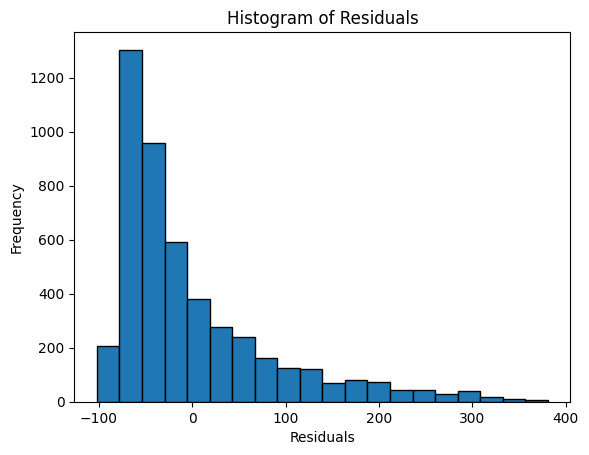

In [7]:
# Plot histogram of residuals
plt.hist(model_cleaned_dffits.resid, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



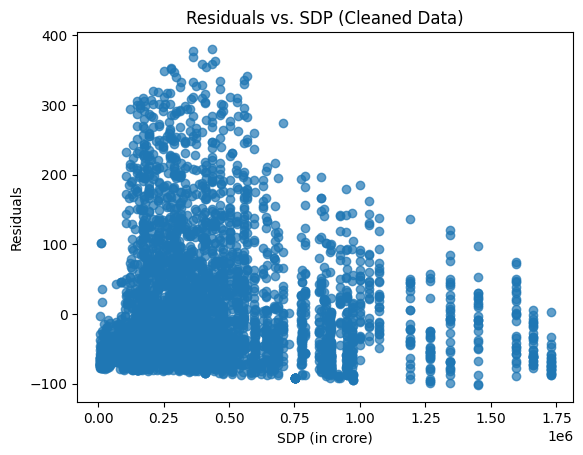

In [8]:
# Plot SDP vs residuals
plt.scatter(df_cleaned_dffits['SDP'], model_cleaned_dffits.resid, alpha=0.7)
plt.title('Residuals vs. SDP (Cleaned Data)')
plt.xlabel('SDP (in crore)')
plt.ylabel('Residuals')
plt.show()


Extended Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Sulfate   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     86.98
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           7.86e-38
Time:                        12:47:06   Log-Likelihood:                -28476.
No. Observations:                4782   AIC:                         5.696e+04
Df Residuals:                    4779   BIC:                         5.698e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.145e-09   6

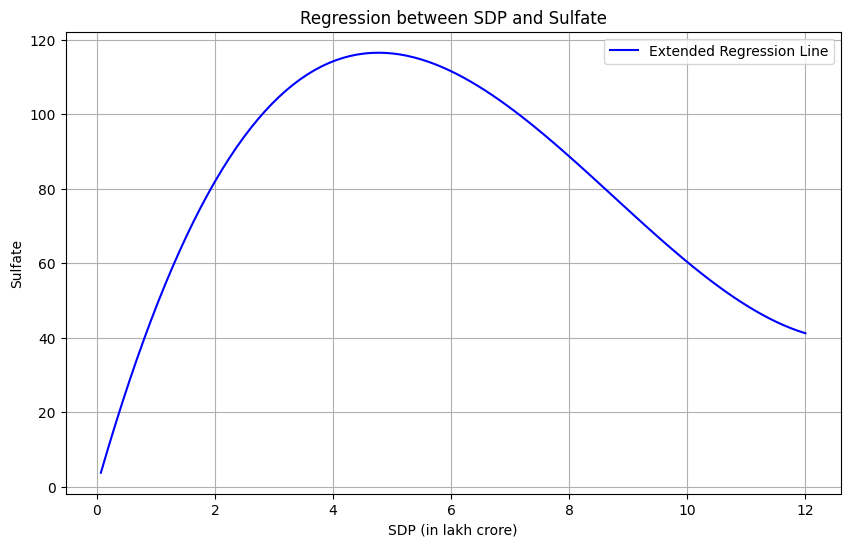

In [9]:
# Q4
# Define independent and dependent variables (only SDP and Gini_index)
X = df[['SDP', 'Gini_index']]  # Independent variables (SDP and Gini_index)
X = sm.add_constant(X)  # Adding a constant term
y = df['Sulfate']  # Dependent variable


# Add squared and cubed terms of SDP
X['SDP_squared'] = X['SDP'] ** 2
X['SDP_cubed'] = X['SDP'] ** 3


# Fit the regression model
model = sm.OLS(y, X).fit()


# Calculate DFFIT values
dffits = model.get_influence().dffits[0]


# Determine cutoff for DFFIT
cutoff_dffits = 2 * np.sqrt((model.df_model + 1) / len(X))


# Identify influential observations based on DFFIT values
outliers_dffits = np.abs(dffits) > cutoff_dffits


# Remove outliers based on DFFITS
df_cleaned_dffits = df[~outliers_dffits]


# Re-run the regression model with the cleaned data (including squared and cubed terms)
X_cleaned_dffits = sm.add_constant(df_cleaned_dffits[['SDP', 'Gini_index']])  # Adding a constant term again
X_cleaned_dffits['SDP_squared'] = X_cleaned_dffits['SDP'] ** 2
X_cleaned_dffits['SDP_cubed'] = X_cleaned_dffits['SDP'] ** 3
y_cleaned_dffits = df_cleaned_dffits['Sulfate']  # Dependent variable


model_cleaned_dffits = sm.OLS(y_cleaned_dffits, X_cleaned_dffits).fit()


# Print the extended model summary
print("Extended Model Summary:")
print(model_cleaned_dffits.summary())


# Extract cleaned dataset with 'SDP', 'Sulfate', and 'Gini_index'
df_cleaned_sdp_sulfate_gini = df_cleaned_dffits[['SDP', 'Sulfate', 'Gini_index']]


# Fit a linear regression model using only 'SDP'
X_sdp = sm.add_constant(df_cleaned_sdp_sulfate_gini['SDP'] / 1e5)  # Adding a constant term and converting SDP to lakh crore
y_sulfate = df_cleaned_sdp_sulfate_gini['Sulfate']  # Dependent variable
model_sdp = sm.OLS(y_sulfate, X_sdp).fit()


# Create a range of SDP values for prediction
sdp_values = np.linspace(df_cleaned_sdp_sulfate_gini['SDP'].min(), 12e5, 100)  # Limit SDP up to 12 lakh crore


# Calculate corresponding Sulfate values using the extended regression equation
sulfate_values_extended = (model_cleaned_dffits.params['const'] + model_cleaned_dffits.params['SDP'] * sdp_values +
                           model_cleaned_dffits.params['Gini_index'] * df_cleaned_sdp_sulfate_gini['Gini_index'].mean() +
                           model_cleaned_dffits.params['SDP_squared'] * sdp_values ** 2 +
                           model_cleaned_dffits.params['SDP_cubed'] * sdp_values ** 3)


# Plot the extended regression line
plt.figure(figsize=(10, 6))


# Plot extended regression line
plt.plot(sdp_values / 1e5, sulfate_values_extended, color='blue', label='Extended Regression Line')
plt.legend()


# Title and labels
plt.title('Regression between SDP and Sulfate')
plt.xlabel('SDP (in lakh crore)')  # Mentioning SDP in lakh crore
plt.ylabel('Sulfate')


# Show plot
plt.grid(True)
plt.legend()


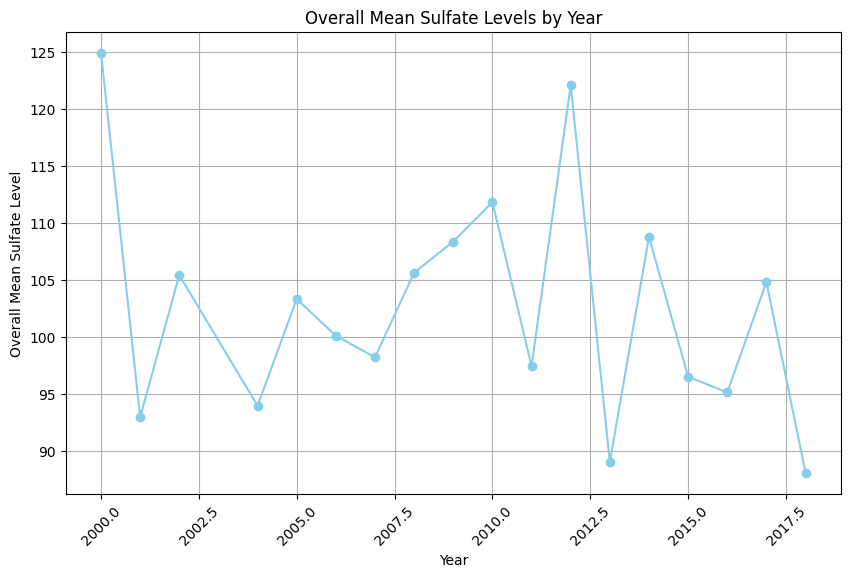

Year-wise Mean Sulfate Levels:
Year: 2000, Mean Sulfate Level: 124.8979248489781
Year: 2001, Mean Sulfate Level: 92.93673908192982
Year: 2002, Mean Sulfate Level: 105.39935741485
Year: 2004, Mean Sulfate Level: 93.94092737279152
Year: 2005, Mean Sulfate Level: 103.30297064214047
Year: 2006, Mean Sulfate Level: 100.089425700369
Year: 2007, Mean Sulfate Level: 98.18705075066225
Year: 2008, Mean Sulfate Level: 105.6083141991968
Year: 2009, Mean Sulfate Level: 108.34410232245614
Year: 2010, Mean Sulfate Level: 111.7944973593361
Year: 2011, Mean Sulfate Level: 97.41794906758243
Year: 2012, Mean Sulfate Level: 122.02896626008584
Year: 2013, Mean Sulfate Level: 89.00890735342679
Year: 2014, Mean Sulfate Level: 108.74752361134276
Year: 2015, Mean Sulfate Level: 96.49466043086956
Year: 2016, Mean Sulfate Level: 95.10947679298995
Year: 2017, Mean Sulfate Level: 104.78680632573528
Year: 2018, Mean Sulfate Level: 88.07330336272973


In [10]:
# Q6

# Exclude data for the year 2003
df_excluding_2003 = df[df['Year'] != 2003]

# Calculate overall mean sulfate for each year
overall_mean_sulfate_by_year = df_excluding_2003.groupby('Year')['Sulfate'].mean()

# Plot line graph of overall mean sulfate levels by year
plt.figure(figsize=(10, 6))
plt.plot(overall_mean_sulfate_by_year.index, overall_mean_sulfate_by_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Overall Mean Sulfate Levels by Year')
plt.xlabel('Year')
plt.ylabel('Overall Mean Sulfate Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print year-wise mean sulfate levels
print("Year-wise Mean Sulfate Levels:")
for year, mean_level in overall_mean_sulfate_by_year.items():
    print(f"Year: {year}, Mean Sulfate Level: {mean_level}")


/var/folders/3p/9n7v6__x539_qs45zqmyctm40000gn/T/ipykernel_36959/2660657678.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, region_avg_sulfate[i] + 0.1, f'Entries: {count}', ha='center', va='bottom')


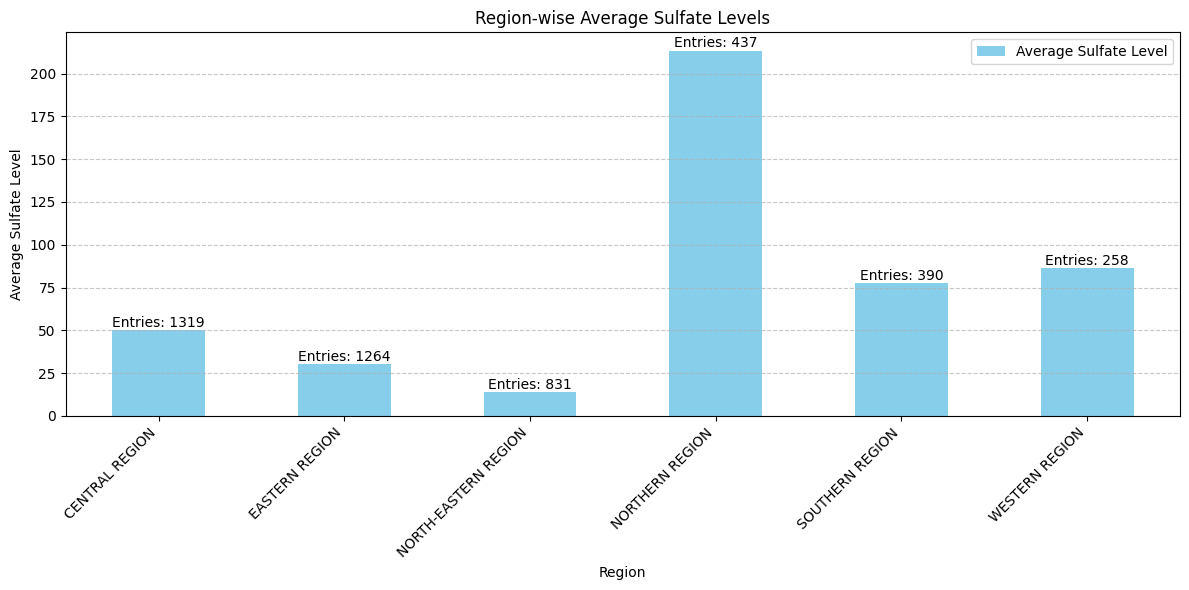

Extended Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Sulfate   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     86.98
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           7.86e-38
Time:                        12:47:16   Log-Likelihood:                -28476.
No. Observations:                4782   AIC:                         5.696e+04
Df Residuals:                    4779   BIC:                         5.698e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.145e-09   6

/var/folders/3p/9n7v6__x539_qs45zqmyctm40000gn/T/ipykernel_36959/2660657678.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_sdp_sulfate_gini_region['Predicted_Sulfate'] = (model_cleaned_dffits.params['const'] +


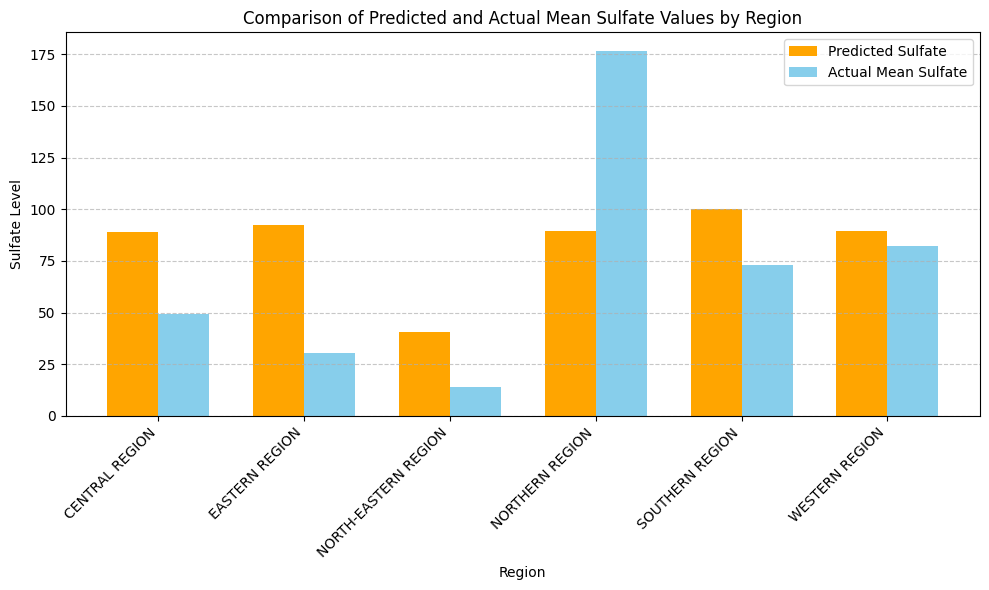

Region: NORTHERN REGION
Mean Predicted Sulfate: 89.64699517268936
Mean Actual Sulfate: 176.81046330538

Region: NORTH-EASTERN REGION
Mean Predicted Sulfate: 40.52492052807036
Mean Actual Sulfate: 14.127571697358974

Region: EASTERN REGION
Mean Predicted Sulfate: 92.53061596227884
Mean Actual Sulfate: 30.399526015581394

Region: CENTRAL REGION
Mean Predicted Sulfate: 89.13339002073954
Mean Actual Sulfate: 49.56248416089598

Region: WESTERN REGION
Mean Predicted Sulfate: 89.66193341103096
Mean Actual Sulfate: 82.31115423565892

Region: SOUTHERN REGION
Mean Predicted Sulfate: 99.96622055616481
Mean Actual Sulfate: 73.24787128650463



In [11]:
# Q7
# Define region mappings
region_mapping = {
   "NORTHERN REGION": ["CHANDIGARH", "DELHI", "HARYANA", "HIMACHAL PRADESH", "JAMMU & KASHMIR", "PUNJAB", "RAJASTHAN"],
   "NORTH-EASTERN REGION": ["ARUNACHAL PRADESH", "ASSAM", "MANIPUR", "MEGHALAYA", "MIZORAM", "NAGALAND", "TRIPURA"],
   "EASTERN REGION": ["ANDAMAN & NICOBAR ISLANDS", "BIHAR", "JHARKHAND", "ORISSA", "SIKKIM", "WEST BENGAL"],
   "CENTRAL REGION": ["CHHATTISGARH", "MADHYA PRADESH", "UTTAR PRADESH", "UTTARANCHAL"],
   "WESTERN REGION": ["DADRA & NAGAR HAVELI", "DAMAN & DIU", "GOA", "GUJARAT", "MAHARASHTRA"],
   "SOUTHERN REGION": ["ANDHRA PRADESH", "KARNATAKA", "KERALA", "LAKSHADWEEP", "PONDICHERRY"]
}


# Create a new column in the DataFrame indicating the region for each state
df['Region'] = df['State'].map({state: region for region, states in region_mapping.items() for state in states})


# Calculate region-wise average sulfate levels
region_avg_sulfate = df.groupby('Region')['Sulfate'].mean()


# Calculate number of entries per region
region_entry_count = df['Region'].value_counts()


# Plot histogram showing region-wise average sulfate levels
plt.figure(figsize=(12, 6))
region_avg_sulfate.plot(kind='bar', color='skyblue', label='Average Sulfate Level')
plt.title('Region-wise Average Sulfate Levels')
plt.xlabel('Region')
plt.ylabel('Average Sulfate Level')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add text annotations for entry count
for i, count in enumerate(region_entry_count):
   plt.text(i, region_avg_sulfate[i] + 0.1, f'Entries: {count}', ha='center', va='bottom')


plt.tight_layout()
plt.legend()
plt.show()


# Define independent and dependent variables (only SDP and Gini_index)
X = df[['SDP', 'Gini_index']]  # Independent variables (SDP and Gini_index)
X = sm.add_constant(X)  # Adding a constant term
y = df['Sulfate']  # Dependent variable


# Add squared and cubed terms of SDP
X['SDP_squared'] = X['SDP'] ** 2
X['SDP_cubed'] = X['SDP'] ** 3


# Fit the regression model
model = sm.OLS(y, X).fit()


# Calculate DFFIT values
dffits = model.get_influence().dffits[0]


# Determine cutoff for DFFIT
cutoff_dffits = 2 * np.sqrt((model.df_model + 1) / len(X))


# Identify influential observations based on DFFIT values
outliers_dffits = np.abs(dffits) > cutoff_dffits


# Remove outliers based on DFFITS
df_cleaned_dffits = df[~outliers_dffits]


# Re-run the regression model with the cleaned data (including squared and cubed terms)
X_cleaned_dffits = sm.add_constant(df_cleaned_dffits[['SDP', 'Gini_index']])  # Adding a constant term again
X_cleaned_dffits['SDP_squared'] = X_cleaned_dffits['SDP'] ** 2
X_cleaned_dffits['SDP_cubed'] = X_cleaned_dffits['SDP'] ** 3
y_cleaned_dffits = df_cleaned_dffits['Sulfate']  # Dependent variable


model_cleaned_dffits = sm.OLS(y_cleaned_dffits, X_cleaned_dffits).fit()


# Print the extended model summary
print("Extended Model Summary:")
print(model_cleaned_dffits.summary())


# Extract cleaned dataset with 'State', 'SDP', 'Sulfate', 'Gini_index', and 'Region'
df_cleaned_sdp_sulfate_gini_region = df_cleaned_dffits[['State', 'SDP', 'Sulfate', 'Gini_index', 'Region']]


# Calculate predicted sulfate values using the extended regression equation
df_cleaned_sdp_sulfate_gini_region['Predicted_Sulfate'] = (model_cleaned_dffits.params['const'] +
                                                           model_cleaned_dffits.params['SDP'] * df_cleaned_sdp_sulfate_gini_region['SDP'] +
                                                           model_cleaned_dffits.params['Gini_index'] * df_cleaned_sdp_sulfate_gini_region['Gini_index'] +
                                                           model_cleaned_dffits.params['SDP_squared'] * df_cleaned_sdp_sulfate_gini_region['SDP'] ** 2 +
                                                           model_cleaned_dffits.params['SDP_cubed'] * df_cleaned_sdp_sulfate_gini_region['SDP'] ** 3)


# Calculate region-wise average of predicted sulfate levels
region_avg_predicted_sulfate = df_cleaned_sdp_sulfate_gini_region.groupby('Region')['Predicted_Sulfate'].mean()


# Calculate region-wise average of factual sulfate levels
region_avg_factual_sulfate = df_cleaned_sdp_sulfate_gini_region.groupby('Region')['Sulfate'].mean()


# Plot region-wise average of predicted sulfate values and actual mean sulfate values
plt.figure(figsize=(10, 6))


# Define the width of each bar
bar_width = 0.35


# Define the positions for the bars
predicted_positions = np.arange(len(region_avg_predicted_sulfate))
factual_positions = [x + bar_width for x in predicted_positions]


# Plot predicted sulfate values
plt.bar(predicted_positions, region_avg_predicted_sulfate.values, color='orange', width=bar_width, label='Predicted Sulfate')


# Plot actual mean sulfate values
plt.bar(factual_positions, region_avg_factual_sulfate.values, color='skyblue', width=bar_width, label='Actual Mean Sulfate')


# Title and labels
plt.title('Comparison of Predicted and Actual Mean Sulfate Values by Region')
plt.xlabel('Region')
plt.ylabel('Sulfate Level')
plt.xticks(predicted_positions + bar_width / 2, region_avg_predicted_sulfate.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Calculate region-wise average of predicted sulfate levels
region_avg_predicted_sulfate = df_cleaned_sdp_sulfate_gini_region.groupby('Region')['Predicted_Sulfate'].mean()

# Calculate region-wise average of factual sulfate levels
region_avg_factual_sulfate = df_cleaned_sdp_sulfate_gini_region.groupby('Region')['Sulfate'].mean()

# Print mean predicted sulfate values versus actual mean sulfate values for every region
for region in region_mapping.keys():
    mean_predicted = region_avg_predicted_sulfate[region]
    mean_actual = region_avg_factual_sulfate[region]
    print(f"Region: {region}")
    print(f"Mean Predicted Sulfate: {mean_predicted}")
    print(f"Mean Actual Sulfate: {mean_actual}")
    print()
